                    CS677 – Introduction to Machine Learning (CRN: 23775) Spring 2023
                                          Project 3

                        Group Member : Malav Shah
                                       Chandani Thumar
                                       Rutik Kothwala

### Exploratory Data Analysis

In [1]:
# Importing necessary laibraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

In [2]:
# Reading the CSV File
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Describing the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
# Checking null values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no null values in the dataset.

In [6]:
# Evaluating Covariance
print('Covariance:')
data.cov()

Covariance:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,141.486483,0.519335,-9.415915e+02,-0.593633,8.460237,0.530565,-6.090712e+04,1.958845,-2.412544,0.372120,0.103847,-206.861351,1.411454
anaemia,0.519335,0.246122,-9.181641e+01,-0.003120,0.185282,0.009057,-2.124536e+03,0.026777,0.091681,-0.022480,-0.024893,-5.445142,0.015376
creatinine_phosphokinase,-941.591531,-91.816413,9.414586e+05,-4.620581,-506.174452,-32.748805,2.321533e+06,-16.470382,254.956443,37.017261,1.098696,-703.803618,28.464468
diabetes,-0.593633,-0.003120,-4.620581e+00,0.244102,-0.028361,-0.003008,4.454928e+03,-0.024010,-0.195226,-0.037261,-0.034006,1.293259,-0.000449
ejection_fraction,8.460237,0.185282,-5.061745e+02,-0.028361,140.063455,0.138325,8.354524e+04,-0.138379,9.185787,-0.839667,-0.372573,38.330464,-1.486667
high_blood_pressure,0.530565,0.009057,-3.274880e+01,-0.003008,0.138325,0.228614,2.336480e+03,-0.002441,0.078292,-0.023916,-0.012458,-7.289904,0.017744
platelets,-60907.118586,-2124.535856,2.321533e+06,4454.928228,83545.241001,2336.480427,9.565669e+09,-4168.399498,26810.436905,-5851.104689,1291.447854,79811.066099,-2247.619159
serum_creatinine,1.958845,0.026777,-1.647038e+01,-0.024010,-0.138379,-0.002441,-4.168399e+03,1.070211,-0.863173,0.003448,-0.013263,-11.988935,0.142374
serum_sodium,-2.412544,0.091681,2.549564e+02,-0.195226,9.185787,0.078292,2.681044e+04,-0.863173,19.469956,-0.058158,0.009932,30.014152,-0.402819
sex,0.372120,-0.022480,3.701726e+01,-0.037261,-0.839667,-0.023916,-5.851105e+03,0.003448,-0.058158,0.228614,0.099706,-0.579224,-0.000965


In [7]:
# Finding number of uniques in particular column
data.nunique(axis=0)

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
# Checking the duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

There is no duplicated values in the dataset.

#### Feature Importance

In [9]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# train a random forest classifier model
model = RandomForestClassifier()
model.fit(X, y)
# get feature importances
importances = model.feature_importances_

# print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

age: 0.08932472727024549
anaemia: 0.01301169954732753
creatinine_phosphokinase: 0.07846526067532887
diabetes: 0.010111749055013983
ejection_fraction: 0.12129902689787117
high_blood_pressure: 0.012676005390985122
platelets: 0.08298918343882056
serum_creatinine: 0.1270357483843905
serum_sodium: 0.06731965594916522
sex: 0.015246920360285788
smoking: 0.01160029929056199
time: 0.37091972374000387


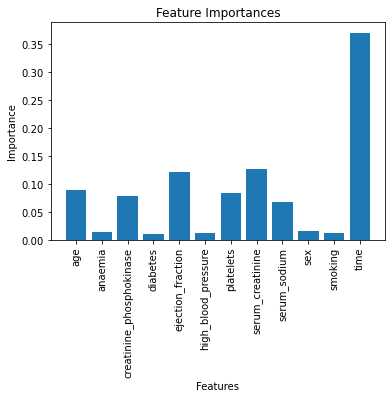

In [10]:
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

From Feature importance technique the column time,creatinine_phosphokinase,ejection_fraction and serum_creatinine is more corelated to the target column which is DEATH_EVENT 

### Comparision of Highly correlated column with the Target column

Time Vs Death Event

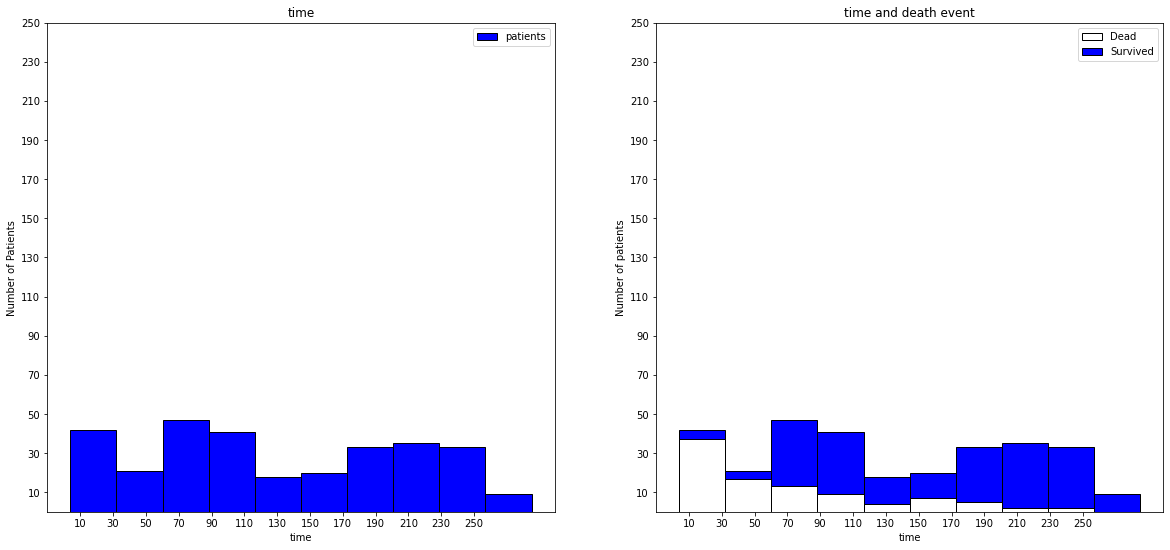

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# plot 1
ax[0].hist(data['time'], color='Blue', label='patients', edgecolor='black')
ax[0].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xlabel('time')
ax[0].set_ylabel('Number of Patients')
ax[0].legend()
ax[0].set_title('time')

# plot 2
ax[1].hist(x=[data[data['DEATH_EVENT'] == 1]['time'], data[data['DEATH_EVENT'] == 0]['time']],
           stacked=True, color=['white', 'blue'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xlabel('time')
ax[1].set_ylabel('Number of patients')
ax[1].set_title('time and death event')
ax[1].legend()

plt.show()


From the above graph it concludes if the patient have less follow up days it found more death event of patient in that period.

Serum_creatinine Vs Death Event

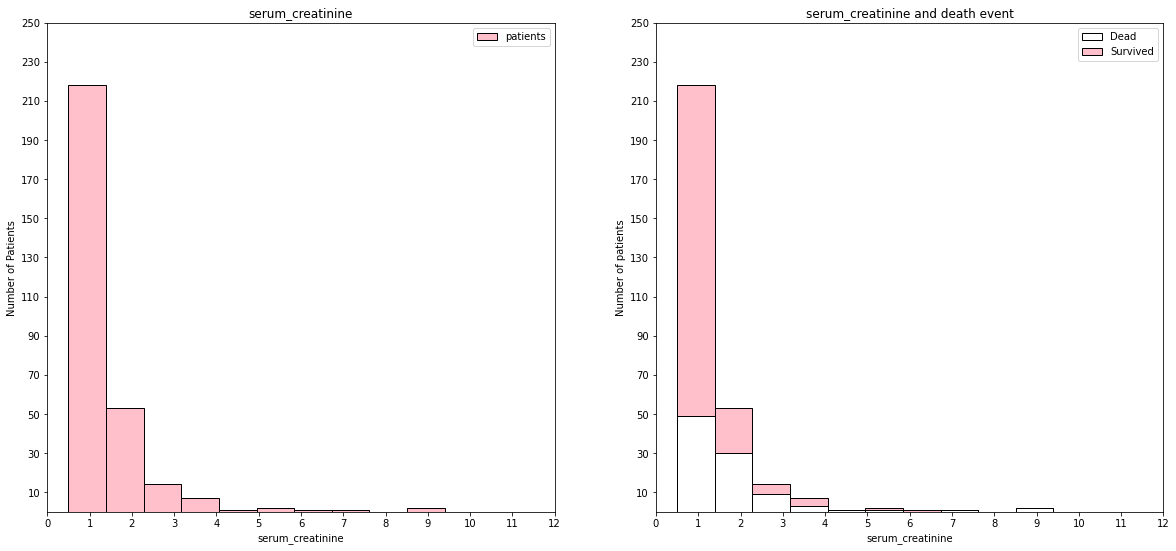

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# plot 1
ax[0].hist(data['serum_creatinine'], color='pink', label='patients', edgecolor='black')
ax[0].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xlabel('serum_creatinine')
ax[0].set_ylabel('Number of Patients')
ax[0].legend()
ax[0].set_title('serum_creatinine')

# plot 2
ax[1].hist(x=[data[data['DEATH_EVENT'] == 1]['serum_creatinine'], data[data['DEATH_EVENT'] == 0]['serum_creatinine']],
           stacked=True, color=['white', 'pink'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[1].set_xlabel('serum_creatinine')
ax[1].set_ylabel('Number of patients')
ax[1].set_title('serum_creatinine and death event')
ax[1].legend()

plt.show()

From the above graph it found more death event due to serum creatinine range between 0.5 to 1.5 and it depends on the various factor too.

##### Comparision with actual range of serum_creatinine in Human Body

For adult men, 0.74 to 1.35 mg/dL 

For adult women, 0.59 to 1.04 mg/dL

In [13]:
men_count = len(data[(data['sex'] == 0) & (data['serum_creatinine'] >= 0.74) & (data['serum_creatinine'] <= 1.35)])
women_count = len(data[(data['sex'] == 1) & (data['serum_creatinine'] >= 0.59) & (data['serum_creatinine'] <= 1.04)])

print(men_count) # Normal
print(women_count) # Normal

print('----')
men_count = len(data[(data['sex'] == 0) & ((data['serum_creatinine'] < 0.74) | (data['serum_creatinine'] > 1.35))])
women_count = len(data[(data['sex'] == 1) & ((data['serum_creatinine'] < 0.59) | (data['serum_creatinine'] > 1.04))])

print(men_count)  # Abnormal
print(women_count) #Abnormal

71
78
----
34
116


Normal serum creatinine range found in 71 men and in 78 women

Abnormal serum creatinine range found in 34 men and 116 women.

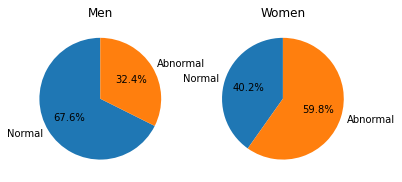

In [14]:
import matplotlib.pyplot as plt

# Calculate counts for normal and abnormal ranges in men and women
men_normal = len(data[(data['sex'] == 0) & (data['serum_creatinine'] >= 0.74) & (data['serum_creatinine'] <= 1.35)])
men_abnormal = len(data[(data['sex'] == 0) & ((data['serum_creatinine'] < 0.74) | (data['serum_creatinine'] > 1.35))])
women_normal = len(data[(data['sex'] == 1) & (data['serum_creatinine'] >= 0.59) & (data['serum_creatinine'] <= 1.04)])
women_abnormal = len(data[(data['sex'] == 1) & ((data['serum_creatinine'] < 0.59) | (data['serum_creatinine'] > 1.04))])

# Create data and labels for pie chart
men_labels = ['Normal', 'Abnormal']
men_data = [men_normal, men_abnormal]

women_labels = ['Normal', 'Abnormal']
women_data = [women_normal, women_abnormal]

# Create subplots for men and women
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot men's pie chart
ax1.pie(men_data, labels=men_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Men')

# Plot women's pie chart
ax2.pie(women_data, labels=women_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Women')

# Show plot
plt.show()

Ejection_fraction Vs Death Event

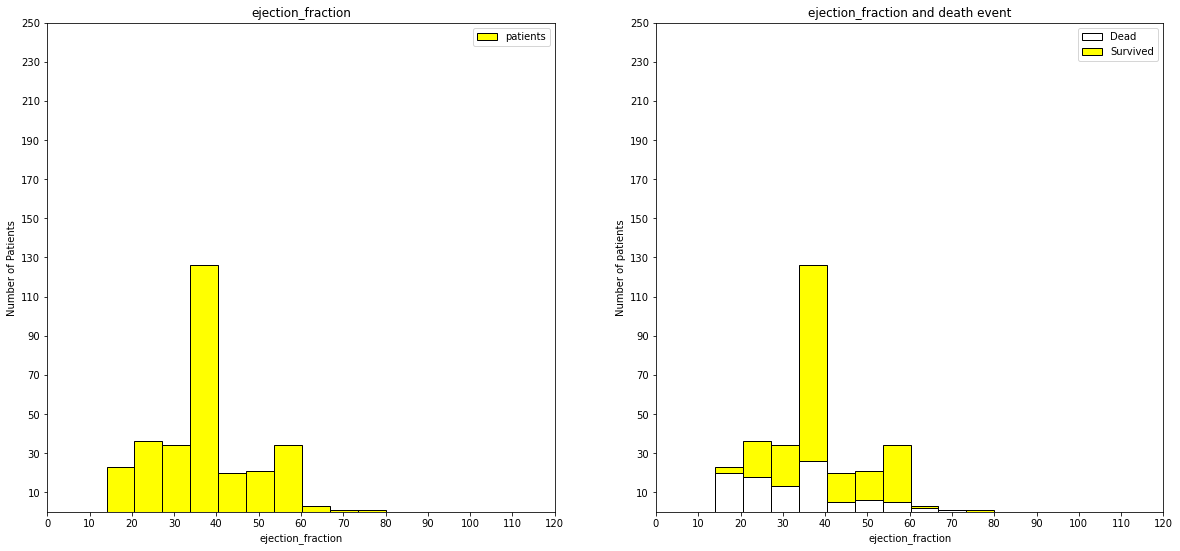

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# plot 1
ax[0].hist(data['ejection_fraction'], color='yellow', label='patients', edgecolor='black')
ax[0].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
ax[0].set_xlabel('ejection_fraction')
ax[0].set_ylabel('Number of Patients')
ax[0].legend()
ax[0].set_title('ejection_fraction')

# plot 2
ax[1].hist(x=[data[data['DEATH_EVENT'] == 1]['ejection_fraction'], data[data['DEATH_EVENT'] == 0]['ejection_fraction']],
           stacked=True, color=['white', 'yellow'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
ax[1].set_xlabel('ejection_fraction')
ax[1].set_ylabel('Number of patients')
ax[1].set_title('ejection_fraction and death event')
ax[1].legend()

plt.show()

From the above graph it found more death event when ejection fraction is between 30 to 40.

A normal ejection fraction is 50 percent or higher. An ejection fraction below 40 percent means your heart isn't pumping enough blood and may be failing

In [16]:
ef_df = data[['ejection_fraction']]

# Print the counts of ejection fraction values below 40 and above 50
print("Number of patients with ejection fraction below 50: ", len(ef_df[ef_df['ejection_fraction'] < 50]))
print("Number of patients with ejection fraction above 50: ", len(ef_df[ef_df['ejection_fraction'] >= 50]))


Number of patients with ejection fraction below 50:  239
Number of patients with ejection fraction above 50:  60


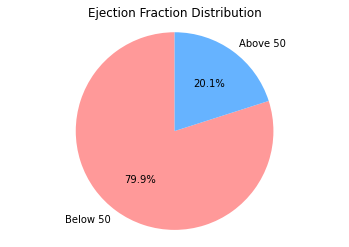

In [17]:
import matplotlib.pyplot as plt

# Get the counts of ejection fraction values below and above 50
below_50 = len(ef_df[ef_df['ejection_fraction'] < 50])
above_50 = len(ef_df[ef_df['ejection_fraction'] >= 50])

# Create a pie chart
labels = ['Below 50', 'Above 50']
sizes = [below_50, above_50]
colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
 
# Add title and display the pie chart
ax1.set_title('Ejection Fraction Distribution')
plt.axis('equal')
plt.show()

Creatinine_phosphokinase Vs Death Event

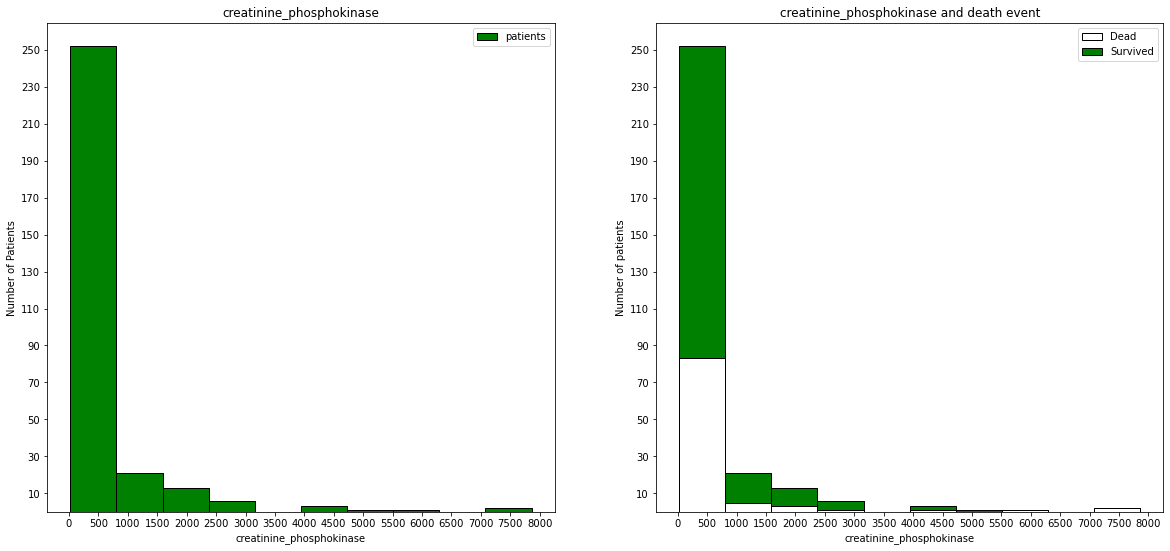

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# plot 1
ax[0].hist(data['creatinine_phosphokinase'], color='green', label='patients', edgecolor='black')
ax[0].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,5500,6000,6500,7000,7500,8000])
ax[0].set_xlabel('creatinine_phosphokinase')
ax[0].set_ylabel('Number of Patients')
ax[0].legend()
ax[0].set_title('creatinine_phosphokinase')

# plot 2
ax[1].hist(x=[data[data['DEATH_EVENT'] == 1]['creatinine_phosphokinase'], data[data['DEATH_EVENT'] == 0]['creatinine_phosphokinase']],
           stacked=True, color=['white', 'green'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,5500,6000,6500,7000,7500,8000])
ax[1].set_xlabel('creatinine_phosphokinase')
ax[1].set_ylabel('Number of patients')
ax[1].set_title('creatinine_phosphokinase and death event')
ax[1].legend()

plt.show()

From the above graph it found more death event when the patient have creatinine phosphokinase is between 0 to 700 and death event also depend on the various factor.

In [19]:
# Count the number of patients with creatinine_phosphokinase within the correct range
cpk_correct_count = len(data[(data['creatinine_phosphokinase'] >= 10) & (data['creatinine_phosphokinase'] <= 120)])

# Count the number of patients with creatinine_phosphokinase outside the correct range
cpk_incorrect_count = len(data[(data['creatinine_phosphokinase'] < 10) | (data['creatinine_phosphokinase'] > 120)])

# Print the counts
print("Number of patients with creatinine_phosphokinase within the correct range: ", cpk_correct_count)
print("Number of patients with creatinine_phosphokinase outside the correct range: ", cpk_incorrect_count)


Number of patients with creatinine_phosphokinase within the correct range:  77
Number of patients with creatinine_phosphokinase outside the correct range:  222


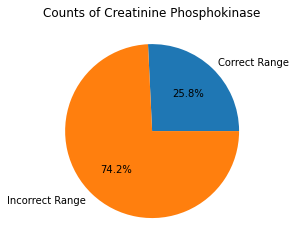

In [20]:
import matplotlib.pyplot as plt

# Create a list of the counts
counts = [cpk_correct_count, cpk_incorrect_count]

# Create a list of the labels
labels = ['Correct Range', 'Incorrect Range']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Counts of Creatinine Phosphokinase')

# Show the chart
plt.show()


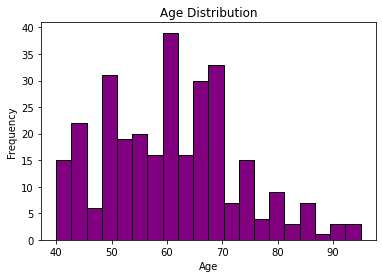

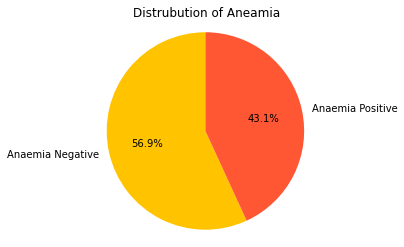

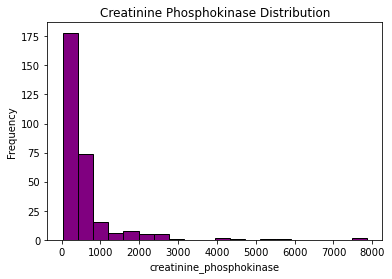

In [21]:
plt.hist(data['age'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

label_map = {0: 'Anaemia Negative', 1: 'Anaemia Positive'}
grouped_data = data.groupby('anaemia').size().reset_index(name='counts')
grouped_data['anaemia'] = grouped_data['anaemia'].map(label_map)
colors = ['#FFC300', '#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['anaemia'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distrubution of Aneamia')
plt.axis('equal')
plt.show()


plt.hist(data['creatinine_phosphokinase'], bins=20, color='purple', edgecolor='black')
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('Frequency')
plt.title('Creatinine Phosphokinase Distribution')
plt.show()

The age distribution graph seems normally distributed with right-skewed, Also the smallest age is 40 years and the most frequent numbers are between 55–60

Proportion of anemia graph, the proportion of anemia uninfected is bigger than anemia infected with 57%

creatinine_phosphokinase distribution graph, the most frequent numbers are between 0–1000 and there are some outliers.

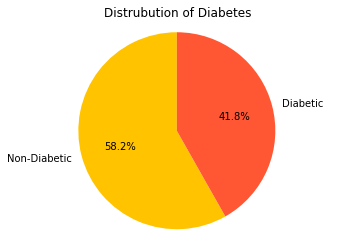

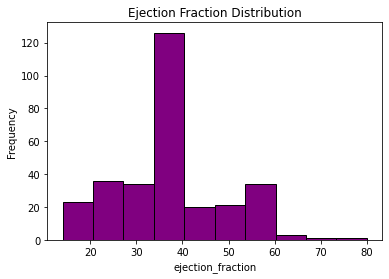

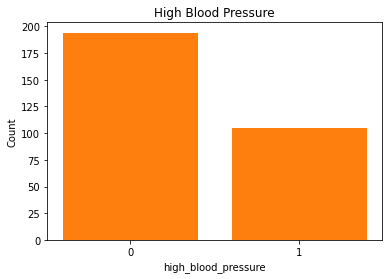

In [22]:
label_map = {0: 'Non-Diabetic', 1: 'Diabetic'}
grouped_data = data.groupby('diabetes').size().reset_index(name='counts')
grouped_data['diabetes'] = grouped_data['diabetes'].map(label_map)
colors = ['#FFC300', '#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['diabetes'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distrubution of Diabetes')
plt.axis('equal')
plt.show()

plt.hist(data['ejection_fraction'], bins=10, color='purple', edgecolor='black')
plt.xlabel('ejection_fraction')
plt.ylabel('Frequency')
plt.title('Ejection Fraction Distribution')
plt.show()


category_col = data['high_blood_pressure']
category_counts = category_col.value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.bar([0, 1], category_counts.values)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('high_blood_pressure')
plt.ylabel('Count')
plt.title('High Blood Pressure')
plt.show()

Proportion of diabetes graph, the proportion of Non diabetics is bigger than diabetics with 58%

Ejection_fraction distribution graph seems normally distributed, Also the most frequent values are between 30–40

High_blood_pressure chart,the high pressure is smaller than no high pressure where high pressure values are around 110 and no high pressure values are around 190

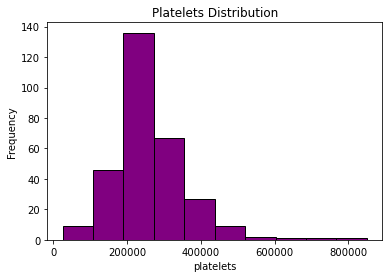

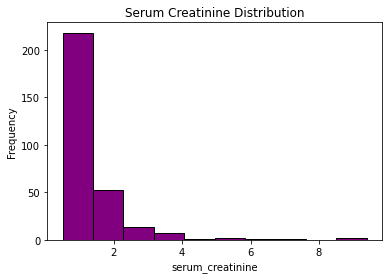

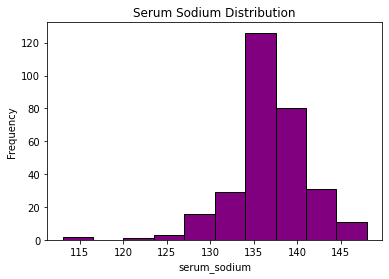

In [23]:
plt.hist(data['platelets'], bins=10, color='purple', edgecolor='black')
plt.xlabel('platelets')
plt.ylabel('Frequency')
plt.title('Platelets Distribution')
plt.show()

plt.hist(data['serum_creatinine'], bins=10, color='purple', edgecolor='black')
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')
plt.title('Serum Creatinine Distribution')
plt.show()

plt.hist(data['serum_sodium'], bins=10, color='purple', edgecolor='black')
plt.xlabel('serum_sodium')
plt.ylabel('Frequency')
plt.title('Serum Sodium Distribution')
plt.show()

Platelets distribution graph, the most frequent numbers are between 200000–400000 and there are some outliers.

Serum_creatinine distribution graph, the most frequent numbers are between 0–2 and there are some outliers.

Serum_sodium distribution graph seems normally distributed with lift-skewed, the most frequent numbers are between 135–140

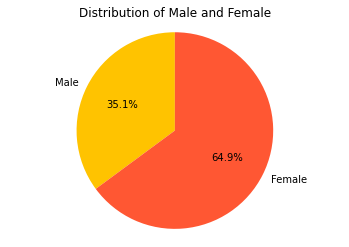

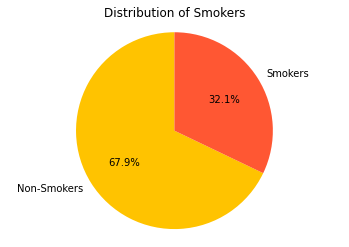

In [24]:
label_map = {0: 'Male', 1: 'Female'}
grouped_data = data.groupby('sex').size().reset_index(name='counts')
grouped_data['sex'] = grouped_data['sex'].map(label_map)
colors = ['#FFC300', '#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['sex'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male and Female')
plt.axis('equal')
plt.show()

label_map = {0: 'Non-Smokers', 1: 'Smokers'}
grouped_data = data.groupby('smoking').size().reset_index(name='counts')
grouped_data['smoking'] = grouped_data['smoking'].map(label_map)
colors = ['#FFC300', '#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['smoking'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Smokers')
plt.axis('equal')
plt.show()

Proportion of smoking graph, we can see that the proportion of non-smokers is bigger than smokers with 68%

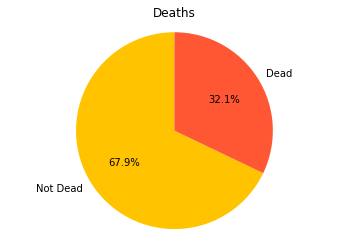

In [25]:
label_map = {0: 'Not Dead', 1: 'Dead'}
grouped_data = data.groupby('DEATH_EVENT').size().reset_index(name='counts')
grouped_data['DEATH_EVENT'] = grouped_data['DEATH_EVENT'].map(label_map)
colors = ['#FFC300', '#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['DEATH_EVENT'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Deaths')
plt.axis('equal')
plt.show()

Proportion of Death Event graph, the proportion of survival is bigger than died with 68%

### Normalization

In [26]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Heatmap

<AxesSubplot:>

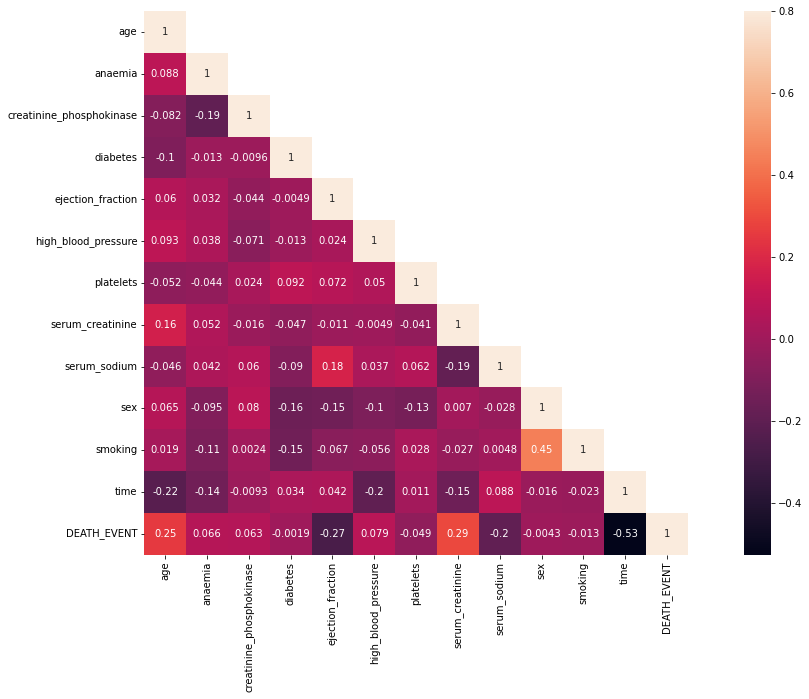

In [27]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Modeling

In [28]:
#input
data_1 = data.drop('DEATH_EVENT', axis=1)
data_1 = np.array(data_1, dtype=int)
#output
target_1 = data['DEATH_EVENT']
target_1 = np.array(target_1, dtype=int)

In [29]:
#Calling some extra libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
# splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(data_1, target_1, test_size=0.2, random_state=4)

### Logistic Regression

In [30]:
import eli5
from sklearn.linear_model import LogisticRegression

In [31]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [32]:
feature_names=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [33]:
# Create a Logistic Regression model
lr_model = LogisticRegression()

# Fit the model to your data
lr_model.fit(x_train, y_train)

# Use eli5 to visualize the feature weights
eli5.show_weights(lr_model, feature_names=feature_names)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weight?,Feature
+0.052,age
+0.008,serum_sodium
+0.007,serum_creatinine
+0.001,diabetes
+0.000,sex
+0.000,anaemia
+0.000,creatinine_phosphokinase
+0.000,<BIAS>
+0.000,smoking
-0.000,platelets


In [34]:
neg_row = x_test[y_test == 0][0]

# Choose a row from your test data with a positive label
pos_row = x_test[y_test == 1][0]

# Use eli5 to explain the prediction for the negative row
neg_explanation = eli5.explain_prediction(lr_model, neg_row)

# Use eli5 to explain the prediction for the positive row
pos_explanation = eli5.explain_prediction(lr_model, pos_row)

# Print the explanations
print("Explanation for negative row:")
print(neg_explanation)
print("Explanation for positive row:")
print(pos_explanation)

Explanation for negative row:
Explanation(estimator='LogisticRegression()', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x4', weight=2.5356538969043902, std=None, value=35.0), FeatureWeight(feature='x11', weight=1.7769364458910752, std=None, value=90.0), FeatureWeight(feature='x6', weight=0.21302205519249692, std=None, value=228000.0)], neg=[FeatureWeight(feature='x0', weight=-2.845328750672486, std=None, value=55.0), FeatureWeight(feature='x8', weight=-1.0284030398847626, std=None, value=135.0), FeatureWeight(feature='x2', weight=-0.014067453348044781, std=None, value=60.0), FeatureWeight(feature='x7', weight=-0.0072900622313550574, std=None, value=1.0), FeatureWeight(feature='x9', weight=-0.0004179171955753942, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=-0.00021350062341964632, std=None, value=1.0), FeatureWeight(feature='x10', weight=-1.96979

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Evaluate the model on the test set
test_pred = lr_model.predict(x_test)
test_proba = lr_model.predict_proba(x_test)[:,1]

# Compute accuracy and AUC-ROC score
accuracy = accuracy_score(y_test, test_pred)
auc_roc = roc_auc_score(y_test, test_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8333
AUC-ROC: 0.8836


In [36]:
# Define the hyperparameter grid
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.1, 1, 10,100,1000],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 500, 1000],
              'tol': [0.0001, 0.001, 0.01],
              'class_weight': [None, 'balanced']}

# Create the grid search object
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = param_grid,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
logreg = LogisticRegression(**best_params)
logreg.fit(x_train, y_train)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 71, in _check_solver
    raise ValueError(
V

LogisticRegression(C=100, max_iter=500, penalty='l1', solver='liblinear',
                   tol=0.01)

In [37]:
clf = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear',
                   tol=0.01)

# Train the model on the training set
clf.fit(x_train, y_train)
# Evaluate the model on the test set
test_pred = clf.predict(x_test)
test_proba = clf.predict_proba(x_test)[:,1]

In [38]:

# Compute accuracy and AUC-ROC score
accuracy = accuracy_score(y_test, test_pred)
auc_roc = roc_auc_score(y_test, test_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8500
AUC-ROC: 0.8690


### Decision Tree Classifier

In [39]:
import eli5
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)

# Show feature importance
eli5.show_weights(dt_model,feature_names=feature_names)

Weight,Feature
0.4742,time
0.1270,serum_sodium
0.1262,ejection_fraction
0.0708,age
0.0662,creatinine_phosphokinase
0.0524,serum_creatinine
0.0407,platelets
0.0389,anaemia
0.0036,smoking
0,sex


In [41]:
# Get an explanation for a negative prediction
eli5.show_prediction(dt_model, x_test[10],feature_names=feature_names)

In [42]:
# Get an explanation for a positive prediction
eli5.show_prediction(dt_model, x_test[0],feature_names=feature_names)

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC-ROC
proba = dt_model.predict_proba(x_test)[:, 1] # get the probability of positive class
auc_roc = roc_auc_score(y_test, proba)
print("AUC-ROC:", auc_roc)


Accuracy: 0.8
AUC-ROC: 0.7619047619047619


In [44]:
# Hyper tunning

In [45]:
# Define the hyperparameter grid
# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21)
}

In [46]:
# Create the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Perform randomized search with stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(dtc, param_distributions=param_dist, cv=cv, n_iter=100, random_state=42)
rand_search.fit(x_train, y_train)

# Get the best model and predict on test set
best_model = rand_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8166666666666667


In [47]:
# Calculate AUC-ROC
proba = best_model.predict_proba(x_test)[:, 1] # get the probability of positive class
auc_roc = roc_auc_score(y_test, proba)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8492063492063492


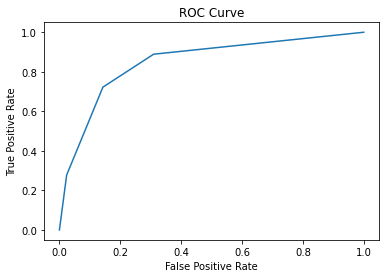

In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get FPR, TPR, and probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

In [50]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Calculate AUC-ROC score of the model
auc_roc = roc_auc_score(y_test, predictions)
print('AUC-ROC score:', auc_roc)

Accuracy: 0.8333333333333334
AUC-ROC score: 0.7857142857142857


In [51]:
# Hyper tunning

In [52]:
estimator = RandomForestClassifier()
param_grid = {
    'max_depth':range(2,7),
    'n_estimators':range(10,30)
}

In [53]:
grid_search_rf = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
)
grid_search_rf.fit(x_train, y_train)
print('Best Parameters were: {}'.format(grid_search_rf.best_params_))
print('Best CrossVal Score was:{}'.format(grid_search_rf.best_score_))

Best Parameters were: {'max_depth': 5, 'n_estimators': 23}
Best CrossVal Score was:0.8578014184397162


In [54]:
rf_clf = RandomForestClassifier(
    max_depth = 3,
    n_estimators = 25
)
rf_clf.fit(
    x_train,
    y_train
)
y_pred_rf = rf_clf.predict(x_test)
print('Random Forrest Accuracy: {}'.format(accuracy_score(y_test, y_pred_rf)))

Random Forrest Accuracy: 0.8


In [55]:
# Calculate AUC-ROC score of the model
auc_roc = roc_auc_score(y_test, y_pred_rf)
print('AUC-ROC score:', auc_roc)

AUC-ROC score: 0.7142857142857143


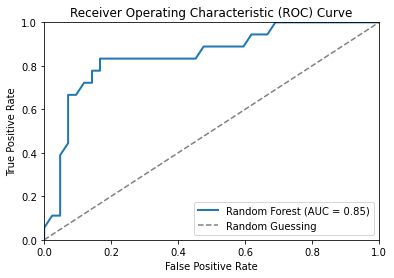

In [56]:
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities for the test data
y_prob = rfc.predict_proba(x_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost

In [57]:
import xgboost as xgb

In [58]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
xg_y_pred = model.predict(x_test)

In [59]:
accuracy = accuracy_score(y_test, xg_y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [60]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

auc_roc = roc_auc_score(y_test, xg_y_pred)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8015873015873016


In [61]:
# Create the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(seed=42)

# Perform randomized search with stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, cv=cv, n_iter=100, random_state=42)
rand_search_xgb.fit(x_train, y_train)

[18:26:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:46] WARNING: C:/buildkite-agent/b

[18:26:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:49] WARNING: C:/buildkite-agent/b

[18:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:53] WARNING: C:/buildkite-agent/b

[18:26:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:26:56] WARNING: C:/buildkite-agent/b

[18:27:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:01] WARNING: C:/buildkite-agent/b

[18:27:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:05] WARNING: C:/buildkite-agent/b

[18:27:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:08] WARNING: C:/buildkite-agent/b

[18:27:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:12] WARNING: C:/buildkite-agent/b

[18:27:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:15] WARNING: C:/buildkite-agent/b

[18:27:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:19] WARNING: C:/buildkite-agent/b

[18:27:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:23] WARNING: C:/buildkite-agent/b

[18:27:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:26] WARNING: C:/buildkite-agent/b

[18:27:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:30] WARNING: C:/buildkite-agent/b


[18:27:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:33] WARNING: C:/buildkite-agent/

[18:27:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[18:27:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
                   random_state=42)

In [62]:
# Get the best model and predict on test set
best_model = rand_search_xgb.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8333333333333334


In [63]:
auc_roc = roc_auc_score(y_test,y_pred)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8015873015873016


In [64]:
import lime
import lime.lime_tabular

In [65]:
data_2 = data.drop('DEATH_EVENT', axis=1)
feature_names = data_2.columns

explainer_rf = lime.lime_tabular.LimeTabularExplainer(data_2.values,
                                                      feature_names=feature_names,
                                                      class_names=['0', '1'],
                                                      discretize_continuous=False)

# Create a LIME explainer for the XGBoost model
explainer_xgb = lime.lime_tabular.LimeTabularExplainer(data_2.values,
                                                       feature_names=feature_names,
                                                       class_names=['0', '1'],
                                                       discretize_continuous=False,
                                                       mode='regression')

# Choose a random instance to explain
instance_idx = np.random.randint(len(data_2))

# Explain the Random Forest model
exp_rf = explainer_rf.explain_instance(data_2.iloc[instance_idx].values, rfc.predict_proba)
print('Random Forest prediction:', rfc.predict([data_2.iloc[instance_idx]])[0])
print('Random Forest explanation:')
for feature, weight in exp_rf.as_list():
    print('{}: {}'.format(feature, weight))

# Explain the XGBoost model
exp_xgb = explainer_xgb.explain_instance(data_2.iloc[instance_idx].values, model.predict)
print('XGBoost prediction:', model.predict([data_2.iloc[instance_idx]])[0])
print('XGBoost explanation:')
for feature, weight in exp_xgb.as_list():
    print('{}: {}'.format(feature, weight))

# Print the coefficients, intercept, and R-squared of the linear model
print('Random Forest linear model coefficients:', exp_rf.local_exp[1])
print('Random Forest linear model intercept:', exp_rf.intercept[1])
print('Random Forest linear model R^2:', exp_rf.score)
print('XGBoost linear model coefficients:', exp_xgb.local_exp)
print('XGBoost linear model intercept:', exp_xgb.intercept[0])
print('XGBoost linear model R^2:', exp_xgb.score)

Random Forest prediction: 0
Random Forest explanation:
time: -0.13717599761535057
ejection_fraction: -0.07750775394251852
serum_creatinine: 0.05301880036487861
age: 0.04349829921190212
serum_sodium: -0.027399931892611352
platelets: -0.009920526881724113
smoking: -0.008106504421009434
high_blood_pressure: 0.006779704845408226
sex: -0.005845520342443635
diabetes: 0.004864141398305535
XGBoost prediction: 0
XGBoost explanation:
time: -0.23508380744374957
ejection_fraction: -0.12491276285495999
serum_creatinine: 0.054947816218588616
serum_sodium: -0.05093517194746324
creatinine_phosphokinase: 0.04224899364948339
sex: -0.021720498424859465
platelets: -0.018573301427421494
age: 0.011214445370255977
smoking: -0.008157379483244093
anaemia: 0.006023991004246043
Random Forest linear model coefficients: [(11, -0.13717599761535057), (4, -0.07750775394251852), (7, 0.05301880036487861), (0, 0.04349829921190212), (8, -0.027399931892611352), (6, -0.009920526881724113), (10, -0.008106504421009434), (5, 

### SHAP

In [66]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


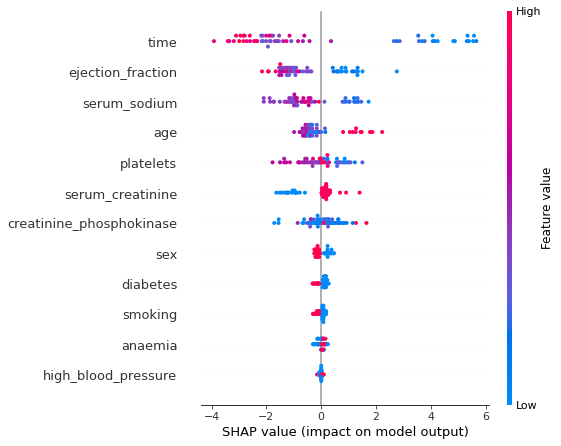

In [67]:
explainer = shap.TreeExplainer(model)

# calculate the SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# set the base value
base_value = explainer.expected_value

# visualize the first prediction with force_plot
shap.force_plot(base_value, shap_values[0,:], pd.DataFrame(x_test).iloc[0,:], feature_names=feature_names)

# visualize the second prediction with force_plot
shap.force_plot(base_value, shap_values[1,:], pd.DataFrame(x_test).iloc[1,:], feature_names=feature_names)

# create the SHAP summary plot for each class/label
shap.summary_plot(shap_values, pd.DataFrame(x_test), feature_names=feature_names)

In [68]:
# define the positive and negative labels
positive_label = 1
negative_label = 0

# select a positive observation and a negative observation from the test set
positive_observation = x_test[0]
negative_observation = x_test[1]

# make predictions for the positive observation with all four models
lr_prediction = clf.predict_proba([positive_observation])[0]
dt_prediction = rand_search.predict_proba([positive_observation])[0]
rf_prediction = rf_clf.predict_proba([positive_observation])[0]
xgb_prediction = rand_search_xgb.predict_proba([positive_observation])[0]

# print the predictions and their accuracy
print(f"Positive observation prediction:")
print(f"LR: [{lr_prediction[positive_label]} {lr_prediction[negative_label]}], Acc: {np.round(lr_prediction[positive_label]*100, 2)}%")
print(f"DT: [{dt_prediction[positive_label]} {dt_prediction[negative_label]}], Acc: {np.round(dt_prediction[positive_label]*100, 2)}%")
print(f"RF: [{rf_prediction[positive_label]} {rf_prediction[negative_label]}], Acc: {np.round(rf_prediction[positive_label]*100, 2)}%")
print(f"XGB: [{xgb_prediction[positive_label]} {xgb_prediction[negative_label]}], Acc: {np.round(xgb_prediction[positive_label]*100, 2)}%")

# make predictions for the negative observation with all four models
lr_prediction = clf.predict_proba([negative_observation])[0]
dt_prediction = rand_search.predict_proba([negative_observation])[0]
rf_prediction = rf_clf.predict_proba([negative_observation])[0]
xgb_prediction = rand_search_xgb.predict_proba([negative_observation])[0]

# print the predictions and their accuracy
print(f"\nNegative observation prediction:")
print(f"LR: [{lr_prediction[positive_label]} {lr_prediction[negative_label]}], Acc: {np.round(lr_prediction[negative_label]*100, 2)}%")
print(f"DT: [{dt_prediction[positive_label]} {dt_prediction[negative_label]}], Acc: {np.round(dt_prediction[negative_label]*100, 2)}%")
print(f"RF: [{rf_prediction[positive_label]} {rf_prediction[negative_label]}], Acc: {np.round(rf_prediction[negative_label]*100, 2)}%")
print(f"XGB: [{xgb_prediction[positive_label]} {xgb_prediction[negative_label]}], Acc: {np.round(xgb_prediction[negative_label]*100, 2)}%")

Positive observation prediction:
LR: [0.06986762122353332 0.9301323787764667], Acc: 6.99%
DT: [0.3673469387755102 0.6326530612244898], Acc: 36.73%
RF: [0.39537312460146934 0.6046268753985308], Acc: 39.54%
XGB: [0.13681867718696594 0.8631813526153564], Acc: 13.68%

Negative observation prediction:
LR: [0.35065667237555864 0.6493433276244414], Acc: 64.93%
DT: [0.07518796992481203 0.924812030075188], Acc: 92.48%
RF: [0.158617035333379 0.8413829646666212], Acc: 84.14%
XGB: [0.0032054041512310505 0.996794581413269], Acc: 99.68%


### Conclusion

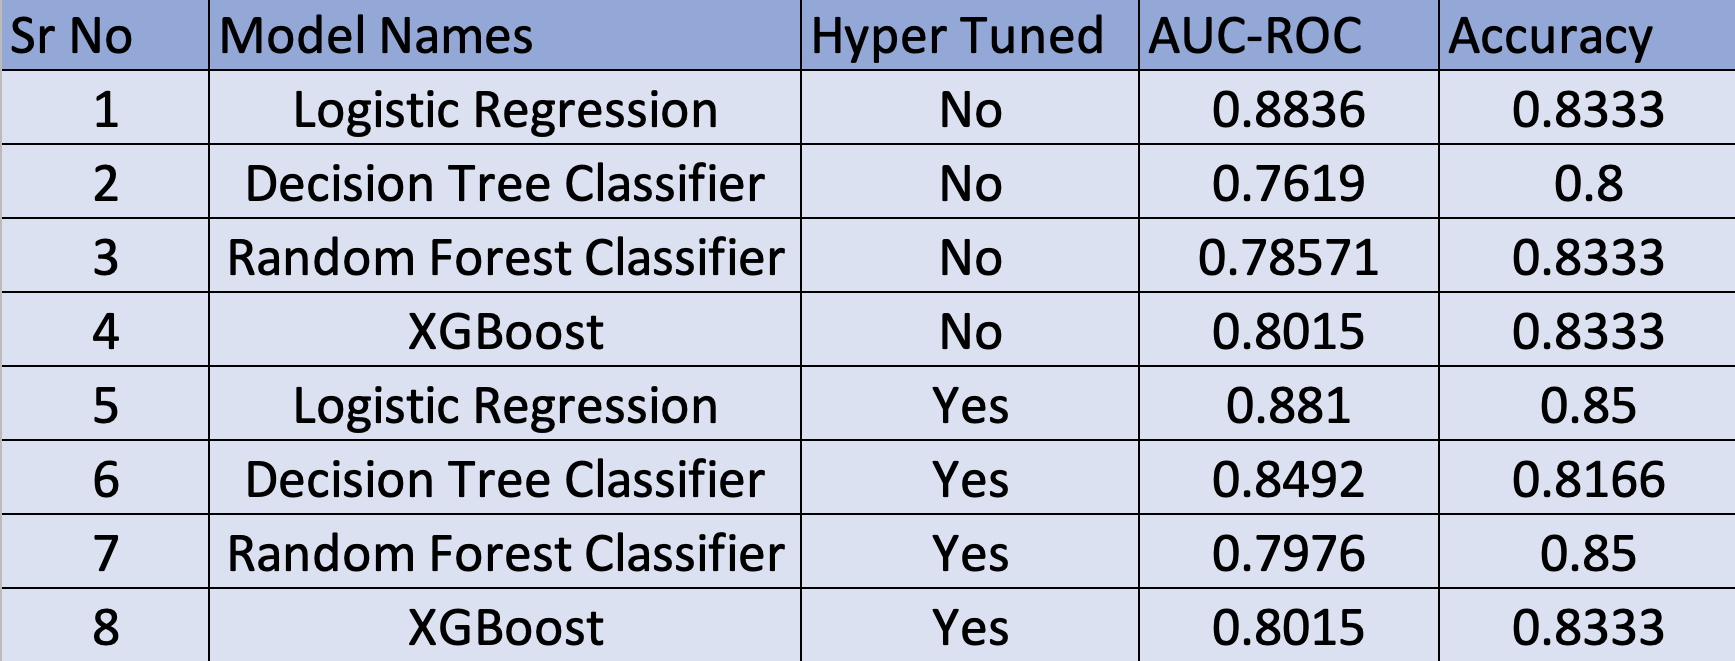

Best model based on accuracy and AUC_ROC is Logistic Regression before tunning and after tunning.